In [116]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.signal import butter, filtfilt

In [117]:
# 1. Moving Average Filter
def moving_average_filter(data, window_size=20):
    data_filted = np.convolve(data, np.ones(window_size) / window_size, mode='same')
    data_filted[:window_size//2] = data[:window_size//2]
    data_filted[-window_size//2:] = data[-window_size//2:]
    return data_filted

# 2. Butterworth Low-Pass Filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

(61, 336, 7)


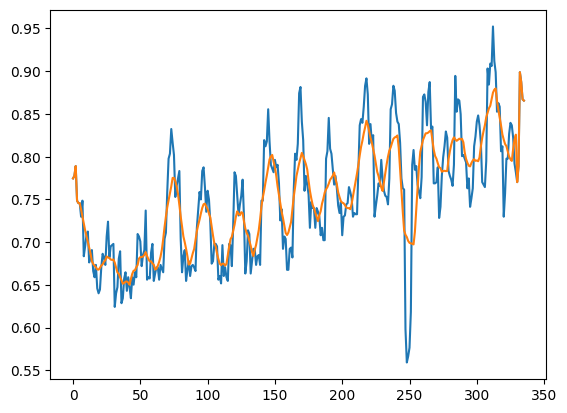

In [127]:
data_path = './Datas/ETTh1/ETTh1_dataset_168.h5'
with h5py.File(data_path, 'r') as f_r:
    data_group = f_r['datas']
    trainset = data_group['trainset'][:]
    print(trainset.shape)

train_2 = trainset[2,:,0]
train_2_avg = moving_average_filter(train_2, 12)

plt.plot(train_2)
plt.plot(train_2_avg)

# try on tensor

In [81]:
import torch

def moving_average_filter(tensor, window_size):
    # Unfold the sequence dimension (seq_length) to apply a sliding window
    unfolded = tensor.unfold(dimension=2, size=window_size, step=1)  # (batch_size, channel, seq_length, window_size)
    
    # Take the mean along the last dimension (window_size)
    smoothed_tensor = unfolded.mean(dim=-1)
    
    return smoothed_tensor

# Example input tensor: (batch_size, channel, seq_length)
batch_size, channel, seq_length = 8, 5, 100
future = torch.randn(batch_size, channel, seq_length)

# Apply the moving average filter with a window size of 5
window_size = 5
filtered_future = moving_average_filter(future, window_size)

print(filtered_future.shape)

torch.Size([8, 5, 96])


In [82]:
future = future.numpy()
filtered_future = filtered_future.numpy()
print(future.shape, filtered_future.shape)

(8, 5, 100) (8, 5, 96)


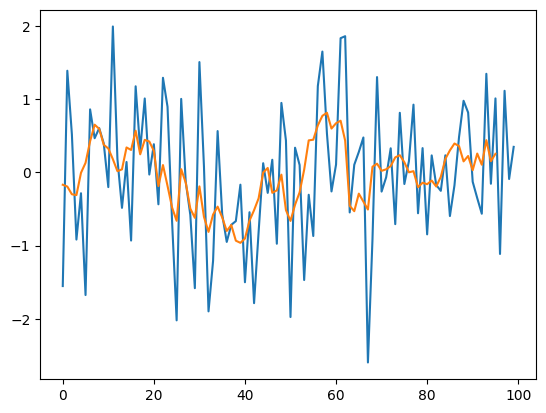

In [83]:
plt.plot(future[0,0,:])
plt.plot(filtered_future[0,0,:])

In [141]:
import torch

def moving_average_filter_same_shape(tensor, window_size):
    # Calculate padding size (we need symmetric padding)
    # padding_size = window_size // 2
    # padding_size = (window_size - 1) // 2
    padding_left = (window_size-1)//2
    padding_right = window_size // 2

    # Pad the tensor along the seq_length dimension
    # padded_tensor = torch.nn.functional.pad(tensor, (padding_size, padding_size), mode='reflect')
    padded_tensor = torch.nn.functional.pad(tensor, (padding_left, padding_right), mode='reflect')

    # Unfold the padded sequence and apply the moving average
    unfolded = padded_tensor.unfold(dimension=2, size=window_size, step=1)  # (batch_size, channel, seq_length, window_size)

    # Take the mean along the last dimension (window_size)
    smoothed_tensor = unfolded.mean(dim=-1)

    return smoothed_tensor

# Example input tensor: (batch_size, channel, seq_length)
batch_size, channel, seq_length = 8, 5, 100
# future = torch.randn(batch_size, channel, seq_length)

future = torch.from_numpy(trainset).permute(0, 2, 1)

# Apply the moving average filter with a window size of 5
window_size = 10
filtered_future = moving_average_filter_same_shape(future, window_size)

print(trainset.shape)
print(filtered_future.shape)  # Output shape will be (batch_size, channel, seq_length), same as input


(61, 336, 7)
torch.Size([61, 7, 336])


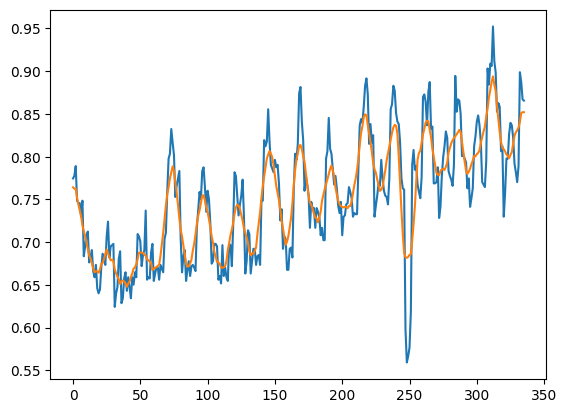

In [142]:
plt.plot(future[2, 0, :])
plt.plot(filtered_future[2, 0, :])